# tf.keras API사용하기



In [0]:
import numpy as np
import matplotlib.pyplot as plt
import tensorflow as tf
%matplotlib inline

print(tf.test.is_gpu_available())

False


### Sequential 모델

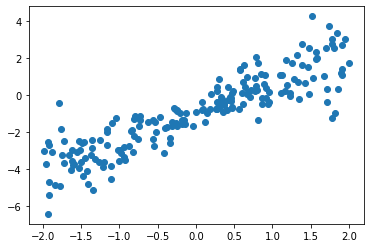

In [0]:
## 랜덤한 회귀용 예제 데이터셋을 만듭니다

np.random.seed(0)

def make_random_data():
    x = np.random.uniform(low=-2, high=2, size=200)
    y = []
    for t in x:
        r = np.random.normal(loc=0.0, 
                             scale=(0.5 + t*t/3), 
                             size=None)
        y.append(r)
    return  x, 1.726*x -0.84 + np.array(y)


x, y = make_random_data() 

plt.plot(x, y, 'o')
plt.show()

In [0]:
# 훈련데이터 / 테스트 데이터 나누기
x_train, y_train = x[:150], y[:150]
x_test, y_test = x[150:], y[150:]

### tf.keras Sequential 모델

Sequential 모델은 순서대로 층을 쌓아 모형을 생성한다. 

* Dense 층은 완전 연결층이다. 

* 이 예제에서는 간단한 y = wx + b 형태의 회귀 모형을 구현한다. 1차원 데이터 셋으로 출력 유닛 하나를 가진 간단한 완전 연결층 하나를 추가한다.

* 회귀모형이므로 마지막 출력층의 활성화 함수를 설정하지 않는다. 

* activation 파라미터의 기본은 None이다. sigmoid, tanh, relu를 지정 가능하다.

In [0]:
model = tf.keras.Sequential()

model.add(tf.keras.layers.Dense(units=1, input_dim=1))

Instructions for updating:
If using Keras pass *_constraint arguments to layers.


In [0]:
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense (Dense)                (None, 1)                 2         
Total params: 2
Trainable params: 2
Non-trainable params: 0
_________________________________________________________________


### 모형의 훈련

**compile()메서드** 


* `loss = 'mean_squared_error'` 에서 회귀문제를 위해 평균제곱오차를 손실함수로 설정한다.
* 참고) 다중 클래스 분류 문제를 위해서는 categorical_crossentropy, 이진 분류에서는 binary_crossentropy를 사용한다.
* `optimizer=tf.keras.optimizers.SGD(0.001)` 경사하강법 옵티마이저를 정한다. SGD 이외에도 여러가지가 있다.

* https://www.tensorflow.org/api_docs/python/tf/keras/optimizers

In [0]:
model.compile(loss='mean_squared_error',
             optimizer=tf.keras.optimizers.SGD(0.001))

#model.compile(optimizer='sgd', loss='mse')
#history = model.fit(x_train, y_train, epochs=100, 
#                    validation_split=0.3)

history = model.fit(x_train, y_train, epochs=100)

Train on 150 samples
Epoch 1/100
150/150 [==============================] - 1s 4ms/sample - loss: 1.8269
Epoch 2/100
150/150 [==============================] - 0s 55us/sample - loss: 1.8064
Epoch 3/100
150/150 [==============================] - 0s 55us/sample - loss: 1.7867
Epoch 4/100
150/150 [==============================] - 0s 54us/sample - loss: 1.7667
Epoch 5/100
150/150 [==============================] - 0s 72us/sample - loss: 1.7469
Epoch 6/100
150/150 [==============================] - 0s 73us/sample - loss: 1.7278
Epoch 7/100
150/150 [==============================] - 0s 64us/sample - loss: 1.7088
Epoch 8/100
150/150 [==============================] - 0s 66us/sample - loss: 1.6904
Epoch 9/100
150/150 [==============================] - 0s 69us/sample - loss: 1.6712
Epoch 10/100
150/150 [==============================] - 0s 51us/sample - loss: 1.6539
Epoch 11/100
150/150 [==============================] - 0s 51us/sample - loss: 1.6368
Epoch 12/100
150/150 [=====================

**fit()메서드**

* `validation_split=0.3` : 검증데이터 크기를  30%로 한다.
* `history` : 히스토리 객체는 epoch마다 계산한 손실 함수 값이 저장되어 있다. 
* 훈련세트에 대한 손실 함수값은 `'loss'` 키에 담겨 있다.

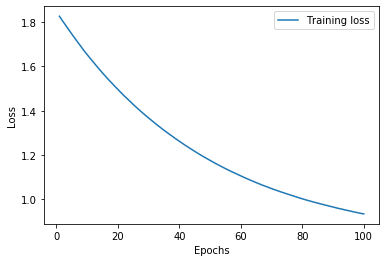

In [0]:
epochs = np.arange(1, 100+1)
plt.plot(epochs, history.history['loss'], label='Training loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.show()

### 함수형 API
sequential 모델은 층을 순서대로 쌓은 것이다. 보다 복잡한 모형을 만들어야 할 때 tf.keras의 함수형 API를 사용하면 더 다양한 모델을 만들 수 있다. 함수형API를 사용하면 원하는 층을 자유롭게 조합 할 수 있다. 

In [0]:
from tensorflow.keras import Model, Input

input = tf.keras.Input(shape=(1,))
output = tf.keras.layers.Dense(1)(input)

model = tf.keras.Model(input, output)

model.summary()

Model: "model"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_1 (InputLayer)         [(None, 1)]               0         
_________________________________________________________________
dense_1 (Dense)              (None, 1)                 2         
Total params: 2
Trainable params: 2
Non-trainable params: 0
_________________________________________________________________


Input layer는 입력데이터를 위한 층으로 훈련할 가중치를 가지고 있지 않다. 

컴파일하고 훈련하는 단계는 sequential 모델과 동일하다.

In [0]:
#model.compile(loss='mean_squared_error',
#              optimizer=tf.keras.optimizers.SGD(lr=0.01))

model.compile(optimizer='sgd', loss='mse')
history = model.fit(x_train, y_train, epochs=100, 
                    validation_split=0.3)

Train on 105 samples, validate on 45 samples
Epoch 1/100
105/105 [==============================] - 0s 657us/sample - loss: 1.6704 - val_loss: 1.3690
Epoch 2/100
105/105 [==============================] - 0s 84us/sample - loss: 1.5178 - val_loss: 1.2808
Epoch 3/100
105/105 [==============================] - 0s 83us/sample - loss: 1.4070 - val_loss: 1.2006
Epoch 4/100
105/105 [==============================] - 0s 76us/sample - loss: 1.3013 - val_loss: 1.1392
Epoch 5/100
105/105 [==============================] - 0s 101us/sample - loss: 1.2227 - val_loss: 1.0920
Epoch 6/100
105/105 [==============================] - 0s 84us/sample - loss: 1.1594 - val_loss: 1.0488
Epoch 7/100
105/105 [==============================] - 0s 103us/sample - loss: 1.0992 - val_loss: 1.0128
Epoch 8/100
105/105 [==============================] - 0s 99us/sample - loss: 1.0486 - val_loss: 0.9816
Epoch 9/100
105/105 [==============================] - 0s 93us/sample - loss: 1.0022 - val_loss: 0.9562
Epoch 10/100
105

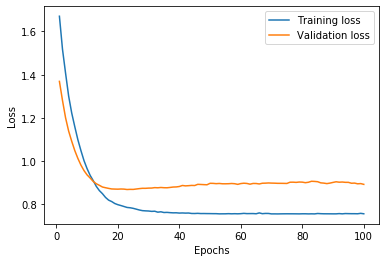

In [0]:
plt.plot(epochs, history.history['loss'], label='Training loss')
plt.plot(epochs, history.history['val_loss'], label='Validation loss') # validation loss
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.show()

### tf.keras 모델의 저장과 복원

In [0]:
model.save_weights('simple_weights.h5')

In [0]:
model = tf.keras.Sequential()
model.add(tf.keras.layers.Dense(units=1, input_dim=1))
model.compile(loss='mean_squared_error',
              optimizer=tf.keras.optimizers.SGD(lr=0.01))

model.load_weights('simple_weights.h5')

In [0]:
model.evaluate(x_test, y_test)

50/50 [==============================] - 0s 475us/sample - loss: 0.9514


0.9514367270469666

In [0]:
model.save('simple_model.h5')

In [0]:
model = tf.keras.models.load_model('simple_model.h5')
model.evaluate(x_test, y_test)

Instructions for updating:
Call initializer instance with the dtype argument instead of passing it to the constructor
Instructions for updating:
Call initializer instance with the dtype argument instead of passing it to the constructor
50/50 [==============================] - 0s 380us/sample - loss: 0.9514


0.9514367270469666

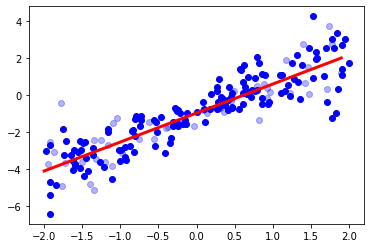

In [0]:
x_arr = np.arange(-2, 2, 0.1)
y_arr = model.predict(x_arr)

plt.figure()
plt.plot(x_train, y_train, 'bo')
plt.plot(x_test, y_test, 'bo', alpha=0.3)
plt.plot(x_arr, y_arr, '-r', lw=3)
plt.show()